In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd

In [8]:
# Reading the data from the Pre-processed file
data = pd.read_csv('cleaned_labelEncoded_PCA_adult.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,income
0,0.585612,-0.708951,-0.394252,0.723986,-1.186807,-0.706480,-2.813949,-0.829748,1.108792,-0.571561,<=50K
1,0.666157,-0.794009,0.128526,-0.026741,-1.777371,-1.184097,-1.460062,-0.316101,0.109311,-1.100819,<=50K
2,1.003859,-0.362138,0.025417,-0.306432,0.475741,-0.694615,0.313164,0.254932,-0.710069,0.140799,<=50K
3,0.759383,1.577882,1.518623,-0.400051,-0.745707,-1.069425,0.678210,-0.063624,0.217335,-2.149402,<=50K
4,-2.779713,3.008856,3.935919,0.275650,0.486809,1.121522,-0.688891,0.225540,-0.897165,2.750224,<=50K


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' is your DataFrame containing features and target
# Drop the target column from features
X = data.drop(columns=['income'])
y = data['income']

# Convert categorical variables into numerical representation (One-Hot Encoding)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Parameter grid for GridSearch
parameter_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=parameter_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from the GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data
predictions = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_rf_model.feature_importances_})
print("Feature Importance:")
print(feature_importance)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Score: 0.8256502490315439
Accuracy: 0.8332042058660764
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      6830
        >50K       0.70      0.55      0.62      2205

    accuracy                           0.83      9035
   macro avg       0.78      0.74      0.76      9035
weighted avg       0.82      0.83      0.83      9035

Feature Importance:
  Feature  Importance
0       0    0.263453
1       1    0.068932
2       2    0.090815
3       3    0.128054
4       4    0.071378
5       5    0.079644
6       6    0.080197
7       7    0.066209
8       8    0.081773
9       9    0.069545


ROC AUC Score: 0.881661537235685


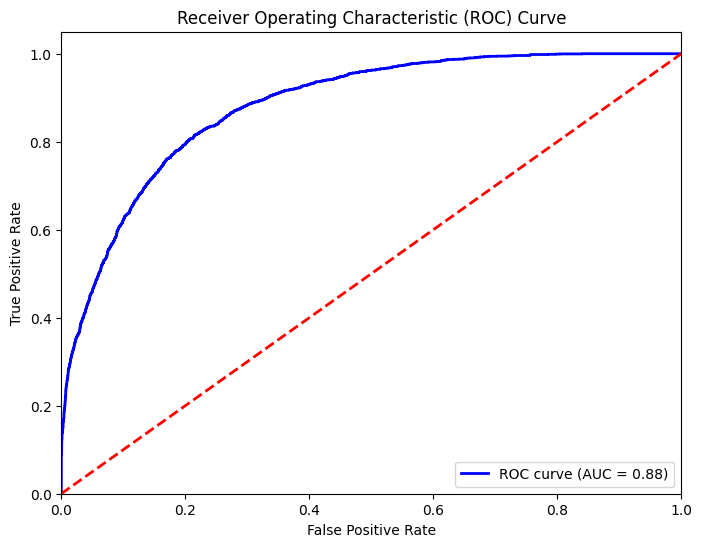

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable into binary labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Get predicted probabilities for the positive class
y_probs = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_probs)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test_encoded, y_probs)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Confusion Matrix

Confusion Matrix:
[[6331  499]
 [1015 1190]]


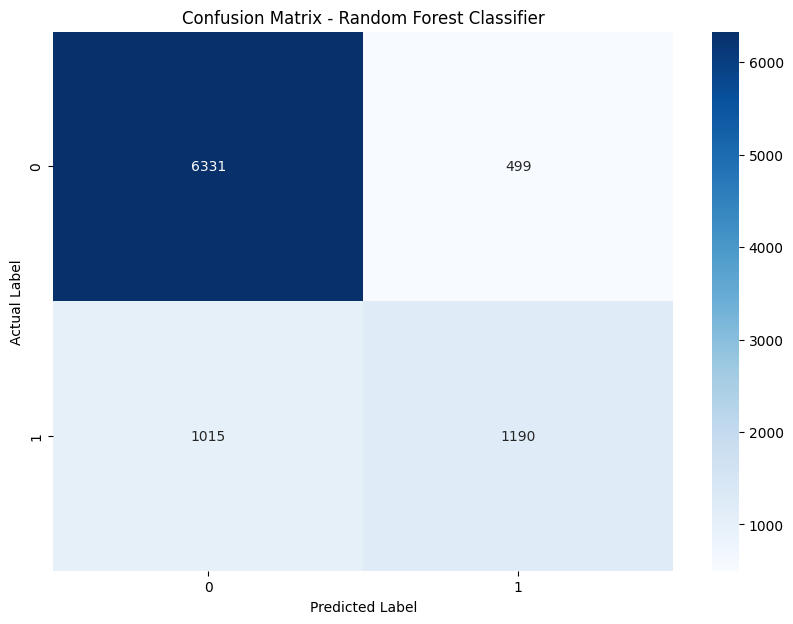

In [ ]:
from sklearn.metrics import confusion_matrix

# Construct confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
